# Sentiment Analysis NLTK
Taken from here: http://www.nltk.org/howto/sentiment.html

In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Sentiment Analysis of Basketball Game Comments
Taken from 100 Post Game College Basketball Threads on Reddit.com/r/collegebasketball

In [33]:
import pandas as pd
df = pd.read_csv('CollegeBasketballReddit.csv',
                 index_col=0,
                 names=['CommentID','Depth','Submission','Username','TeamFlair','Score','Body'])

In [34]:
df.head()

,Depth,Submission,Username,TeamFlair,Score,Body
CommentID,,,,,,
t1_df5posm,0,[Post Game Thread] #7 South Carolina defeats #...,Addyct,Luhvul,1,Hi /r/all. Please keep this thread civil. [The...
t1_df5pf7q,0,[Post Game Thread] #7 South Carolina defeats #...,btr154,NO FLAIR,2892,65 points in the second half for South Carolin...
t1_df5pfed,0,[Post Game Thread] #7 South Carolina defeats #...,NO AUTHOR,NO FLAIR,3075,[deleted]
t1_df5pg9f,0,[Post Game Thread] #7 South Carolina defeats #...,apiffany,Dayton Flyers,2572,http://i.imgur.com/WpKhtQO.gifv
t1_df5pfrm,0,[Post Game Thread] #7 South Carolina defeats #...,raptorsbucketnator,Oregon Ducks,1397,I have no clue what the South Carolina coach t...


## Pull out just the coments as a list

In [44]:
comments_list = df.Body.tolist()

In [50]:
comments_list[500]

"I don't hate Duke  but I'm so glad Grayson Allen is out of the tournament."

In [ ]:
sid = SentimentIntensityAnalyzer()
for comment in comments_list:
    print(comment)
    ss = sid.polarity_scores(comment)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [60]:
comment_list_short = comments_list[4:6]

In [65]:
comment_list_short

['I have no clue what the South Carolina coach told his guys at the half  but whatever it was seemed to give birth to a non-stop energy offensive juggernaut.   For a seemingly uneventful round of 64 upset wise  the round of 32 was everything fans of chaos could of hoped for.',
 "Thanks Wisconsin  you've just paved a road for Duke to get to the Final Four "]

In [67]:
ss_list = []
compound_scores = []
neg_scores = []
neu_scores = []
pos_scores = []

for comment in comment_list_short:
    print(comment)
    ss = sid.polarity_scores(comment)
    # Store All Scores in List
    ss_list.append(ss)
    
    # Store Scores In Seperate lists
    compound_scores.append(ss[compound])
    neg_scores.append(ss[neg])
    
    # Print results too
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

I have no clue what the South Carolina coach told his guys at the half  but whatever it was seemed to give birth to a non-stop energy offensive juggernaut.   For a seemingly uneventful round of 64 upset wise  the round of 32 was everything fans of chaos could of hoped for.
compound: -0.5927, 
neg: 0.215, 
neu: 0.628, 
pos: 0.156, 
Thanks Wisconsin  you've just paved a road for Duke to get to the Final Four 
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 


In [81]:
df_small = df.head()

In [118]:
def calculate_VADER(comment):
    comment = str(comment)
    ss = sid.polarity_scores(comment)
    neg = ss['neg']
    neu = ss['neu']
    pos = ss['pos']
    compound = ss['compound']
    return ss, neg, neu, pos, compound

In [107]:
results = df_small.apply(calculate_VADER, axis=1)

In [114]:
df_small['ss'], df_small['neg'], df_small['neu'], df_small['pos'], df_small['compound'] = \
    zip(*df_small['Body'].map(calculate_VADER))

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_small

,Depth,Submission,Username,TeamFlair,Score,Body,ss,neg,neu,pos,compound
CommentID,,,,,,,,,,,
t1_df5posm,0,[Post Game Thread] #7 South Carolina defeats #...,Addyct,Luhvul,1,Hi /r/all. Please keep this thread civil. [The...,"{'neg': 0.073, 'neu': 0.563, 'pos': 0.364, 'co...",0.073,0.563,0.364,0.7750
t1_df5pf7q,0,[Post Game Thread] #7 South Carolina defeats #...,btr154,NO FLAIR,2892,65 points in the second half for South Carolin...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.000,0.817,0.183,0.5859
t1_df5pfed,0,[Post Game Thread] #7 South Carolina defeats #...,NO AUTHOR,NO FLAIR,3075,[deleted],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
t1_df5pg9f,0,[Post Game Thread] #7 South Carolina defeats #...,apiffany,Dayton Flyers,2572,http://i.imgur.com/WpKhtQO.gifv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
t1_df5pfrm,0,[Post Game Thread] #7 South Carolina defeats #...,raptorsbucketnator,Oregon Ducks,1397,I have no clue what the South Carolina coach t...,"{'neg': 0.215, 'neu': 0.628, 'pos': 0.156, 'co...",0.215,0.628,0.156,-0.5927


## VADER on All Data

In [119]:
df['ss'], df['neg'], df['neu'], df['pos'], df['compound'] = \
    zip(*df['Body'].map(calculate_VADER))

In [121]:
df.head()

,Depth,Submission,Username,TeamFlair,Score,Body,ss,neg,neu,pos,compound
CommentID,,,,,,,,,,,
t1_df5posm,0,[Post Game Thread] #7 South Carolina defeats #...,Addyct,Luhvul,1,Hi /r/all. Please keep this thread civil. [The...,"{'neg': 0.073, 'neu': 0.563, 'pos': 0.364, 'co...",0.073,0.563,0.364,0.7750
t1_df5pf7q,0,[Post Game Thread] #7 South Carolina defeats #...,btr154,NO FLAIR,2892,65 points in the second half for South Carolin...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.000,0.817,0.183,0.5859
t1_df5pfed,0,[Post Game Thread] #7 South Carolina defeats #...,NO AUTHOR,NO FLAIR,3075,[deleted],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
t1_df5pg9f,0,[Post Game Thread] #7 South Carolina defeats #...,apiffany,Dayton Flyers,2572,http://i.imgur.com/WpKhtQO.gifv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
t1_df5pfrm,0,[Post Game Thread] #7 South Carolina defeats #...,raptorsbucketnator,Oregon Ducks,1397,I have no clue what the South Carolina coach t...,"{'neg': 0.215, 'neu': 0.628, 'pos': 0.156, 'co...",0.215,0.628,0.156,-0.5927


In [122]:
df.to_csv('Reddit_BasketBall_Comments_with_VADER.csv')

In [124]:
df.sort_values('neg', ascending=False).head()

,Depth,Submission,Username,TeamFlair,Score,Body,ss,neg,neu,pos,compound
CommentID,,,,,,,,,,,
t1_dfswook,2,[Post Game Thread] #1 North Carolina defeats #...,gorges,North Carolina Tar Heels,11,nah,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,-0.1027
t1_dbbpp99,2,[Post Game Thread] #6 Kentucky Defeats #7 Nort...,eatapenny,Virginia Cavaliers,80,Nah.,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,-0.1027
t1_dfpr5kq,3,[Post Game Thread] #1 Gonzaga defeats #7 South...,duelingdelbene,North Carolina Tar Heels,0,no,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,-0.2960
t1_d1evdmh,1,[Post Game Thread] #2 Villanova defeats #1 Kan...,Playbook420,Kansas Jayhawks,4,:(,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,-0.4404
t1_d166g1h,2,[Post Game Thread] 5-seed Indiana defeats 4-se...,snorp,Indiana Hoosiers,20,Savage.,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,-0.4588


## EDA of some of the Most Positive and Negative Comments

In [256]:
df.loc[df['pos'] > 0.9][['Depth','Score','Body']][0:5]

,Depth,Score,Body
CommentID,,,
t1_df5pgao,0,2,lol
t1_df5pohk,0,2,Awesome!!
t1_df5qvbx,0,2,Amazing.
t1_df5spbt,0,2,Beautiful.
t1_df5pgsd,0,1,YES


In [260]:
df.loc[df['neg'] > 0.9][['Depth','Score','Body']][0:5]

,Depth,Score,Body
CommentID,,,
t1_df5q8z8,1,10,Savage
t1_df5qpaa,1,3,Damn.
t1_df612cw,1,1,no
t1_df5ppkv,1,1,No.
t1_df5pqnc,1,1,no.


In [268]:
# Negative between 0.5 and 0.7
df.loc[(df['neg'] > 0.5) & (df['neg'] < 0.7) ][['Depth','Score','TeamFlair','pos','neg','Body']][0:10]

,Depth,Score,TeamFlair,pos,neg,Body
CommentID,,,,,,
t1_df5pl80,0,22,Purdue Boilermakers,0.0,0.585,*ahem* FUCK GRAYSON ALLEN
t1_df5plmx,0,8,UNC Wilmington Seahawks,0.0,0.600,Grayson Allen can suck a Cock
t1_df5qn8i,0,5,Ohio State Buckeyes,0.0,0.639,Ding dong the witch is dead!
t1_df5pism,0,4,Kansas Jayhawks,0.0,0.630,EAT PUKE DUKE
t1_df5qf3q,0,5,NO FLAIR,0.0,0.608,Poor Mrs. Vitale.
t1_df5r29d,0,5,Wisconsin Badgers,0.0,0.688,Get fucked Duke
t1_df5r8d6,0,3,NO FLAIR,0.0,0.574,Fire Coach K!
t1_df5pfs8,0,9,Oklahoma Sooners,0.0,0.645,**MARCH MADNESS ROUND II: THE CHAOS STRIKES BA...
t1_df5pt9x,0,5,West Virginia Mountaineers,0.0,0.636,Fuck Grayson Allen


In [267]:
# Positive between 0.5 and 0.7
df.loc[(df['pos'] > 0.5) & (df['pos'] < 0.7) ][['Depth','Score','pos','neg','Body']][0:10]

,Depth,Score,pos,neg,Body
CommentID,,,,,
t1_df5pwbb,0,5,0.588,0.0,This has certainly been a pleasant day.
t1_df5pqkq,0,8,0.551,0.0,I heard a hilarious joke today: ACC basketball.
t1_df5pllg,0,5,0.661,0.0,Lmao fucc duke
t1_df5pgrp,0,3,0.630,0.0,Really awesome to see south carolina play so w...
t1_df5pm4a,0,3,0.692,0.0,I LOVE THESE COCKS!
t1_df5q464,0,3,0.542,0.0,Congrats South Carolina. That was a very sati...
t1_df5qkm8,0,3,0.588,0.0,I hope Grayson Allen had a nice trip
t1_df5qxcw,0,3,0.583,0.0,Big if true
t1_df5ruwy,0,3,0.574,0.0,This pleases me.


In [129]:
import numpy as np
flair = df.groupby('TeamFlair').aggregate(np.average)

In [139]:
%matplotlib inline

In [137]:
import seaborn as sns

# Plot to Compare Sentiment metrics and Upvotes

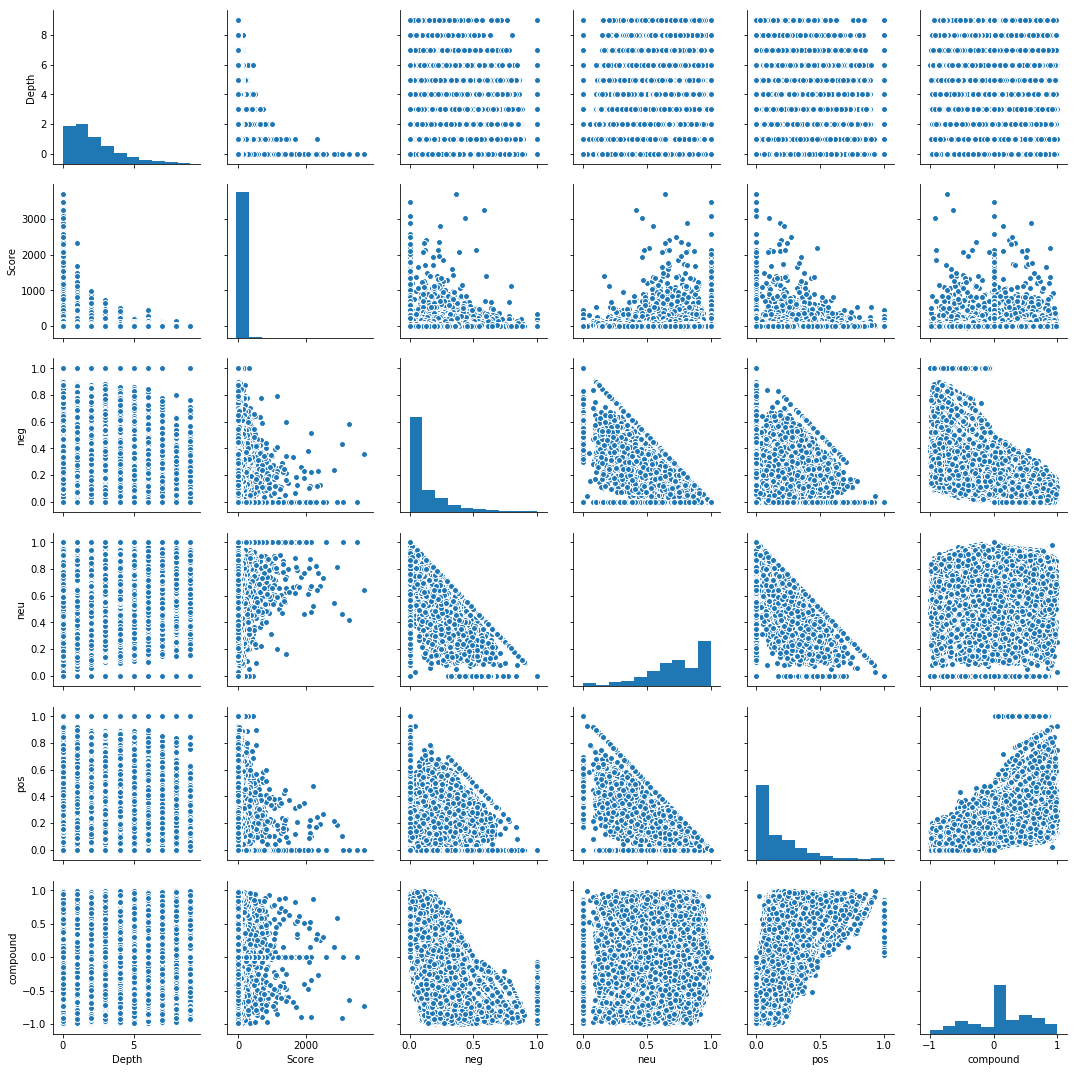

In [138]:
sns.pairplot(df)

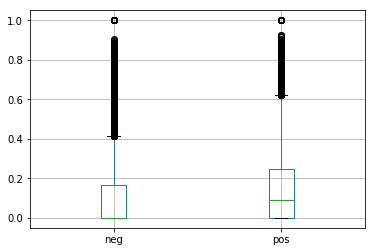

In [144]:
df[['neg','pos']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a252cbd30>,
      dtype=object)

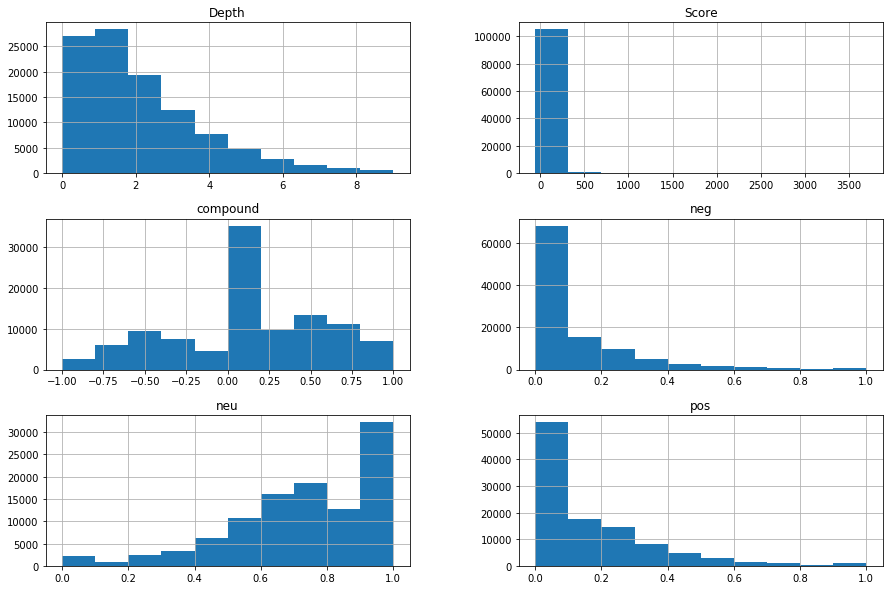

In [155]:
df.hist(figsize=(15,10))

In [158]:
# Split Negative and Positive Comments
negative_comments = df.loc[df['neg'] >= 0.2]
positive_comments = df.loc[df['pos'] >= 0.2]
print(negative_comments.shape)
print(positive_comments.shape)

(21865, 11)
(34175, 11)


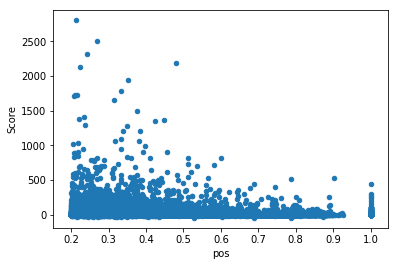

In [173]:
positive_comments.plot(x='pos',y='Score', kind='scatter')

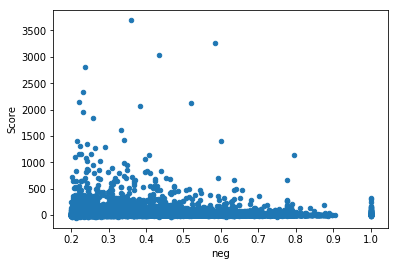

In [175]:
negative_comments.plot(x='neg',y='Score', kind='scatter')

In [180]:
df_first_depth = df.loc[df['Depth'] == 0]

In [196]:
df.loc['t1_cm6qrrb']

Depth                                                         7
Submission    [Post Game Thread] #1 Kentucky defeats #5 Kans...
Username                                              CyBerPike
TeamFlair                                   Iowa State Cyclones
Score                                                        -3
Body                                         Educate yourself. 
ss            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
neg                                                           0
neu                                                           1
pos                                                           0
compound                                                      0
LogScore                                                    NaN
Name: t1_cm6qrrb, dtype: object

In [206]:
df['LogScorePlus1'] = np.log(df['Score'] + 1)

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [202]:
df['LogScore'] = df['Score'].apply(np.log)

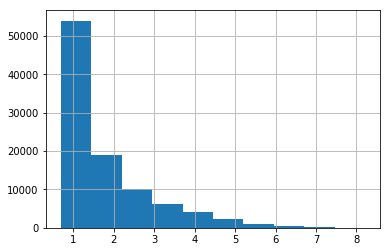

In [214]:
df.loc[df['Score'] > 0]['LogScorePlus1'].hist()

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


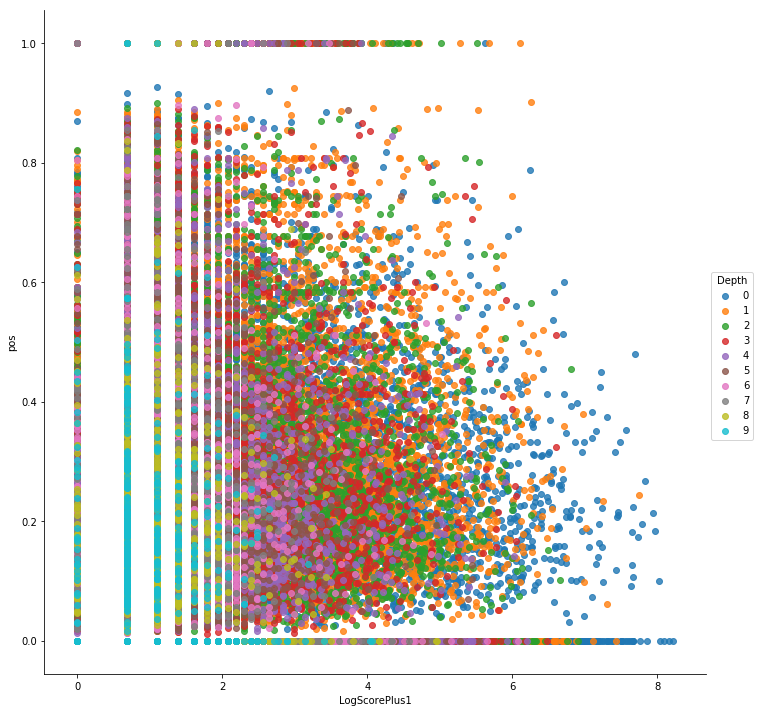

In [226]:
sns.lmplot(x='LogScorePlus1', y='pos', data=df, hue='Depth', size=10)

# See if Comment Depth correlates to Positive or Negative Comments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a44c9c9b0>,
      dtype=object)

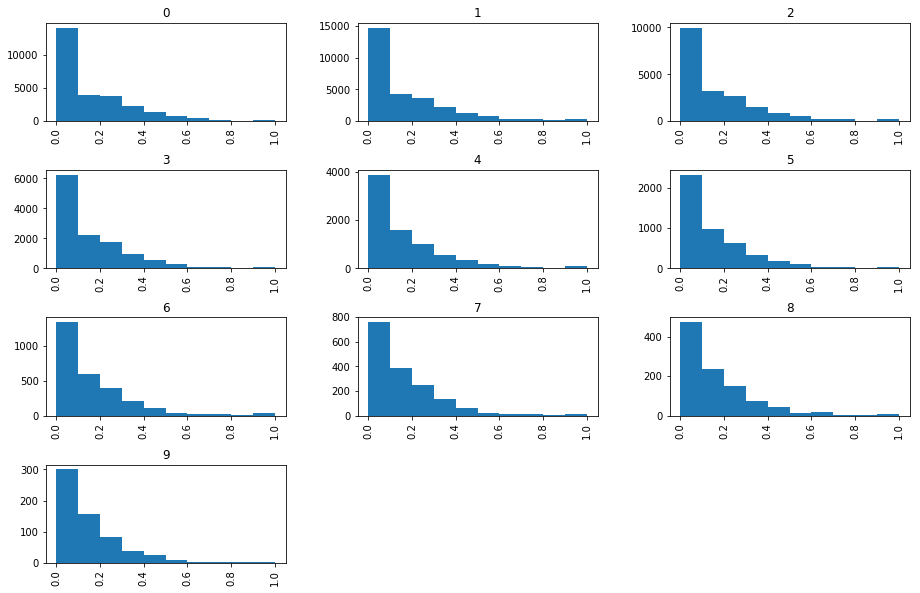

In [247]:
df['pos'].hist(by=df['Depth'], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43e59390>,
      dtype=object)

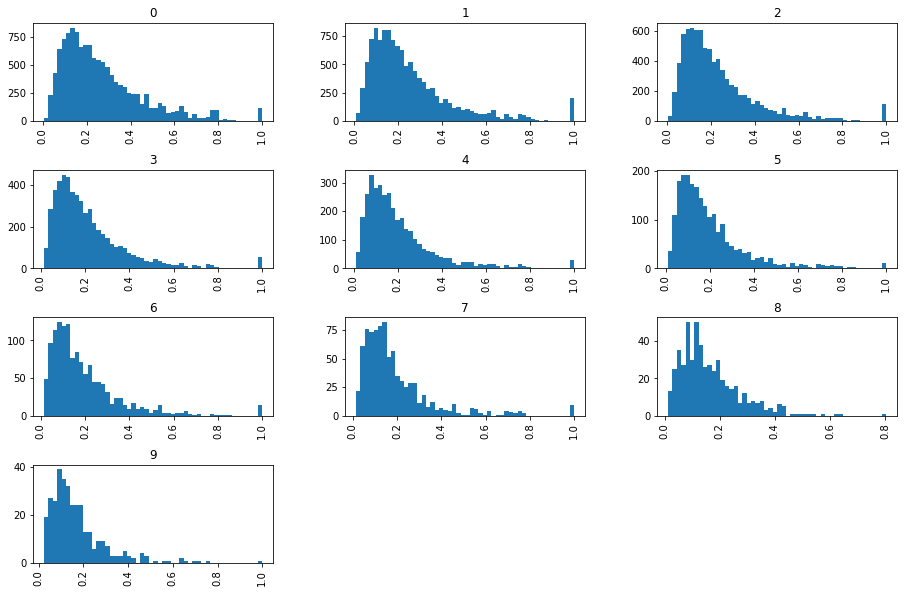

In [250]:
df.loc[df['neg'] > 0]['neg'].hist(by=df['Depth'], figsize=(15,10), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fef6cc0>,
      dtype=object)

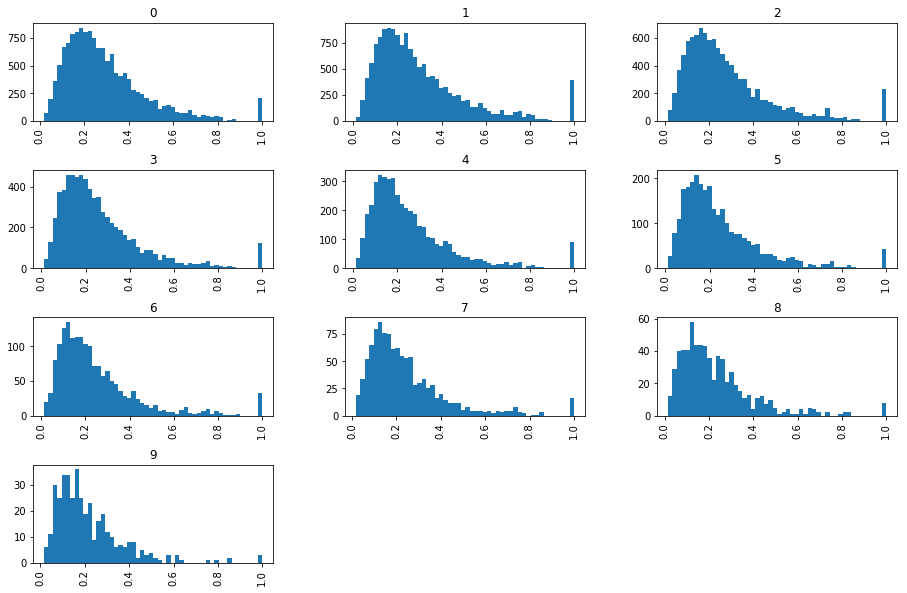

In [251]:
df.loc[df['pos'] > 0]['pos'].hist(by=df['Depth'], figsize=(15,10), bins=50)